# Predicting Operational Efficiency of Manufacturing Teams - Stitching Unit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('manufacturing_data.csv')

## Split the DataFrames

In [3]:
stitching_df = df[df['productionDept'] == "Stitching Unit"].copy()

In [4]:
stitching_df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
5,2/16/2015,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,0.0,0,No Style Change,59.0,0.800980
8,1/24/2015,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417
9,3/5/2015,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,No Style Change,52.0,0.750396


In [5]:
stitching_df.tail()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
1183,1/20/2015,Q3,Stitching Unit,Tuesday,Line-S3,0.70,22.52,1134.0,8460,50,0.0,0,No Style Change,57.0,0.750038
1185,1/8/2015,Q2,Stitching Unit,Thursday,Line-S1,0.80,26.16,1189.0,10620,75,0.0,0,No Style Change,59.0,0.850502
1187,3/8/2015,Q2,Stitching Unit,Sunday,Line-C2,0.60,30.48,869.0,6720,0,0.0,0,Minor Style Revision,56.0,0.600529
1191,1/7/2015,Q1,Stitching Unit,Wednesday,Line-F2,0.70,21.98,413.0,9720,40,0.0,0,No Style Change,58.0,0.700481
1195,2/19/2015,Q3,Stitching Unit,Thursday,Line-C1,0.75,30.10,444.0,0,0,5.0,20,Minor Style Revision,59.0,0.611141


In [6]:
print(stitching_df['productionDept'].value_counts())

productionDept
Stitching Unit    691
Name: count, dtype: int64


In [7]:
stitching_df.shape

(691, 15)

In [8]:
stitching_df.isnull().sum()

recordDate             0
fiscalQuarter          0
productionDept         0
dayOfWeek              0
team                   0
plannedEfficiency      0
standardMinuteValue    0
workInProgress         0
overtimeMinutes        0
performanceBonus       0
idleMinutes            0
idleWorkers            0
styleChangeCount       0
workerCount            0
efficiencyScore        0
dtype: int64

In [9]:
stitching_df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,52.445731,0.722013
std,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,9.417353,0.154784
min,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,52.000000,0.661470
50%,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,57.000000,0.750608
75%,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,58.000000,0.800402
max,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,89.000000,1.100484


In [10]:
stitching_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1195
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           691 non-null    object 
 1   fiscalQuarter        691 non-null    object 
 2   productionDept       691 non-null    object 
 3   dayOfWeek            691 non-null    object 
 4   team                 691 non-null    object 
 5   plannedEfficiency    691 non-null    float64
 6   standardMinuteValue  691 non-null    float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      691 non-null    int64  
 9   performanceBonus     691 non-null    int64  
 10  idleMinutes          691 non-null    float64
 11  idleWorkers          691 non-null    int64  
 12  styleChangeCount     691 non-null    object 
 13  workerCount          691 non-null    float64
 14  efficiencyScore      691 non-null    float64
dtypes: float64(6), int64(3), object(6)
memory us

## Data Preprocessing

#### Extract month from recordDate and drop recordDate: Since all years are the same and the exact date is not meaningful, we will extract the month from the recordDate column to provide temporal context, then drop the original date column.

In [11]:
stitching_df['month'] = pd.to_datetime(stitching_df['recordDate']).dt.month

#### Drop fiscalQuarter: The fiscalQuarter column contains values from Q1 to Q5, but the records cover only three months, making these quarter assignments unreliable or irrelevant for modeling.
#### Drop productionDept: Each subset (Stitching or Finishing) contains only one unique value for productionDept, so it does not provide any discriminative information.

In [12]:
stitching_df = stitching_df.drop(columns=['fiscalQuarter', 'productionDept', 'recordDate'])

#### Lable encoded teams: No. of teams is large and have many different values.

In [13]:
from sklearn.preprocessing import LabelEncoder

stitching_df['team_enc'] = LabelEncoder().fit_transform(stitching_df['team'])
stitching_df[['team', 'team_enc']].head()

,team,team_enc
0,Line-S1,9
1,Line-F3,4
5,Line-F2,3
8,Line-C1,0
9,Line-Q1,7


#### One-Hot Encode dayOfWeek and styleChangeCount
#### Why?
#### These columns are categorical with no “order” one-hot encoding is the best way for most ML models to use them.
#### This will create a new column for each unique value in these categories, with a 1 where that value is present and 0 elsewhere.

In [14]:
stitching_df = pd.get_dummies(
    stitching_df, 
    columns=['dayOfWeek', 'styleChangeCount'],
    prefix=['day', 'style'],
    drop_first=True 
)

In [15]:
stitching_df.head()

,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore,month,team_enc,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,style_Minor Style Revision,style_No Style Change
0,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,42.0,0.268214,2,9,False,False,False,True,False,True,False
1,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,31.0,0.800359,1,4,False,False,False,False,False,False,True
5,Line-F2,0.80,30.10,461.0,0,0,0.0,0,59.0,0.800980,2,3,False,False,False,False,False,False,True
8,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,56.5,0.650417,1,0,True,False,False,False,False,False,True
9,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,52.0,0.750396,3,7,False,False,True,False,False,False,True


In [16]:
stitching_df.shape

(691, 19)

In [17]:
stitching_df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore,month,team_enc
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,52.445731,0.722013,1.722142,5.509407
std,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,9.417353,0.154784,0.730943,3.431881
min,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705,1.000000,0.000000
25%,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,52.000000,0.661470,1.000000,3.000000
50%,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,57.000000,0.750608,2.000000,5.000000
75%,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,58.000000,0.800402,2.000000,8.000000
max,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,89.000000,1.100484,3.000000,11.000000


### Adding New Features (efficiencyPerWorker, bonusPerWorker)

In [18]:
stitching_df['efficiencyPerWorker'] = stitching_df['efficiencyScore'] / stitching_df['workerCount']
stitching_df['bonusPerWorker'] = stitching_df['performanceBonus'] / stitching_df['workerCount']
stitching_df[['efficiencyPerWorker', 'bonusPerWorker']].describe()

,efficiencyPerWorker,bonusPerWorker
count,691.000000,691.000000
mean,0.014426,0.879904
std,0.004834,0.553438
min,0.004100,0.000000
25%,0.012073,0.526316
50%,0.013792,0.865385
75%,0.015728,1.210526
max,0.028862,2.421053


### Outlier Handling and Feature Scaling (Min-Max Scaling)
##### (standardMinuteValue, workInProgress, overtimeMinutes, performanceBonus, workerCount, efficiencyScore, month)

In [19]:
from sklearn.preprocessing import MinMaxScaler

minmax_features = ['standardMinuteValue', 'workInProgress', 'overtimeMinutes', 'performanceBonus', 'workerCount', 'efficiencyScore', 'month']

scaler_stitch = MinMaxScaler()
stitching_df[minmax_features] = scaler_stitch.fit_transform(stitching_df[minmax_features])

stitching_df[minmax_features].describe()

,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,month
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.296460,0.051199,0.251088,0.322343,0.419774,0.563359,0.361071
std,0.156740,0.079492,0.110513,0.199975,0.149482,0.178574,0.365471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196360,0.033204,0.175926,0.217391,0.412698,0.493510,0.000000
50%,0.280162,0.044646,0.263889,0.326087,0.492063,0.596349,0.500000
75%,0.405078,0.053883,0.277778,0.434783,0.507937,0.653796,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Select Features and Prepare Train/Test Data

In [20]:
from sklearn.model_selection import train_test_split

features = [
    'plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'performanceBonus', 'workInProgress',
    'workerCount', 'month', 'team_enc', 'day_Saturday', 'day_Sunday', 'day_Thursday',
    'day_Tuesday', 'day_Wednesday', 'style_Minor Style Revision', 'style_No Style Change'
]
target = 'efficiencyScore'

X_stitch = stitching_df[features]
y_stitch = stitching_df[target]

X_train_stitch, X_test_stitch, y_train_stitch, y_test_stitch = train_test_split(
    X_stitch, y_stitch, test_size=0.2, random_state=42
)

print("Stitching shapes:", X_train_stitch.shape, X_test_stitch.shape)

Stitching shapes: (552, 15) (139, 15)


## Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train
lr_stitch = LinearRegression()
lr_stitch.fit(X_train_stitch, y_train_stitch)

# Predict
y_pred_stitch = lr_stitch.predict(X_test_stitch)

# Evaluate
print("Stitching - Linear Regression")
print("R^2:", r2_score(y_test_stitch, y_pred_stitch))
print("MSE:", mean_squared_error(y_test_stitch, y_pred_stitch))
print("MAE:", mean_absolute_error(y_test_stitch, y_pred_stitch))

Stitching - Linear Regression
R^2: 0.756612208196956
MSE: 0.005735825581007383
MAE: 0.05225110951131185


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_stitch = RandomForestRegressor(random_state=42)
rf_stitch.fit(X_train_stitch, y_train_stitch)

y_pred_stitch_rf = rf_stitch.predict(X_test_stitch)

print("Stitching - Random Forest")
print("R^2:", r2_score(y_test_stitch, y_pred_stitch_rf))
print("MSE:", mean_squared_error(y_test_stitch, y_pred_stitch_rf))
print("MAE:", mean_absolute_error(y_test_stitch, y_pred_stitch_rf))

Stitching - Random Forest
R^2: 0.7593132343401436
MSE: 0.005672171546709711
MAE: 0.04456156686022775


## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

gb_stitch = GradientBoostingRegressor(random_state=42)
gb_stitch.fit(X_train_stitch, y_train_stitch)
y_pred_stitch_gb = gb_stitch.predict(X_test_stitch)

print("Stitching - Gradient Boosting")
print("R^2:", r2_score(y_test_stitch, y_pred_stitch_gb))
print("MSE:", mean_squared_error(y_test_stitch, y_pred_stitch_gb))
print("MAE:", mean_absolute_error(y_test_stitch, y_pred_stitch_gb))

Stitching - Gradient Boosting
R^2: 0.7484424209110103
MSE: 0.0059283597856154635
MAE: 0.047482229578549695


#### Insights:
##### All models perform well, with R² around 0.75–0.76.
##### Random Forest has the highest R², lowest MSE, and the lowest MAE, making it the best performer for Stitching.
##### Gradient Boosting is close but slightly underperforms compared to Random Forest and Linear Regression.
##### Random Forest’s lower MAE (0.0446) suggests it makes the smallest average prediction errors.

## Feature Importance for the Best Models

### Stitching: Random Forest

Stitching - Random Forest Feature Importances:
performanceBonus              0.705751
plannedEfficiency             0.113952
workInProgress                0.039997
overtimeMinutes               0.036518
standardMinuteValue           0.035010
workerCount                   0.019681
team_enc                      0.018211
month                         0.006208
day_Wednesday                 0.006175
day_Thursday                  0.004757
day_Sunday                    0.004504
day_Tuesday                   0.003026
style_No Style Change         0.002144
day_Saturday                  0.002064
style_Minor Style Revision    0.002002
dtype: float64


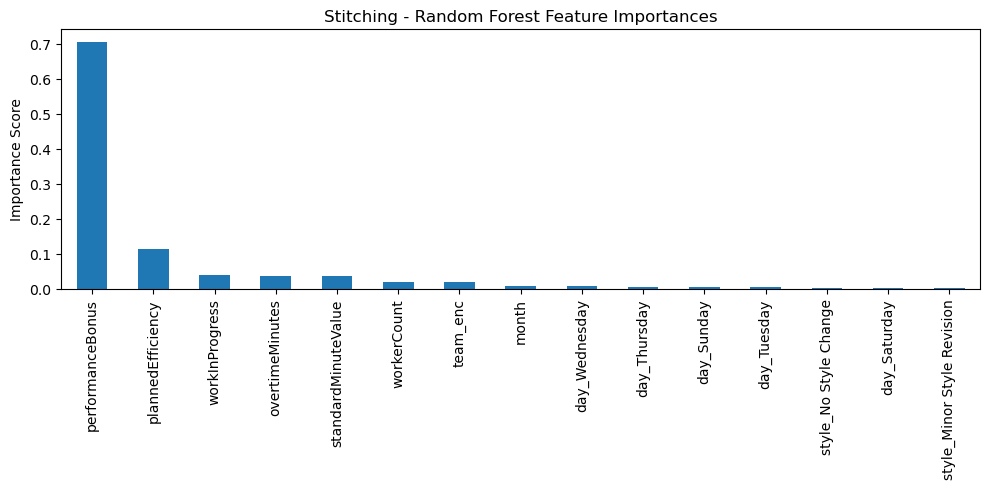

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = pd.Series(rf_stitch.feature_importances_, index=X_train_stitch.columns).sort_values(ascending=False)

print("Stitching - Random Forest Feature Importances:")
print(rf_importances)

rf_importances.plot(kind='bar', figsize=(10, 5), title='Stitching - Random Forest Feature Importances')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Hyperparameter Tuning (Random Forest)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_rf.fit(X_train_stitch, y_train_stitch)

# Evaluating on test set
y_pred_rf_best = grid_rf.predict(X_test_stitch)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Test R² (tuned):", r2_score(y_test_stitch, y_pred_rf_best))
print("Test MSE (tuned):", mean_squared_error(y_test_stitch, y_pred_rf_best))
print("Test MAE (tuned):", mean_absolute_error(y_test_stitch, y_pred_rf_best))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Test R² (tuned): 0.7643202526633932
Test MSE (tuned): 0.005554173090130146
Test MAE (tuned): 0.047290970036765995


In [28]:
print(grid_rf.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
